# Support Vector Machines with Python¶


Welcome to the Support Vector Machines with Python Notebook! 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data set

In [4]:
from sklearn.datasets import load_breast_cancer

In [6]:
df = load_breast_cancer()
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(df['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
df['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Setup Dataframe

In [12]:
df_feat = pd.DataFrame(df['data'], columns=df['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Do some EDA and data cleaning if needed

<AxesSubplot:>

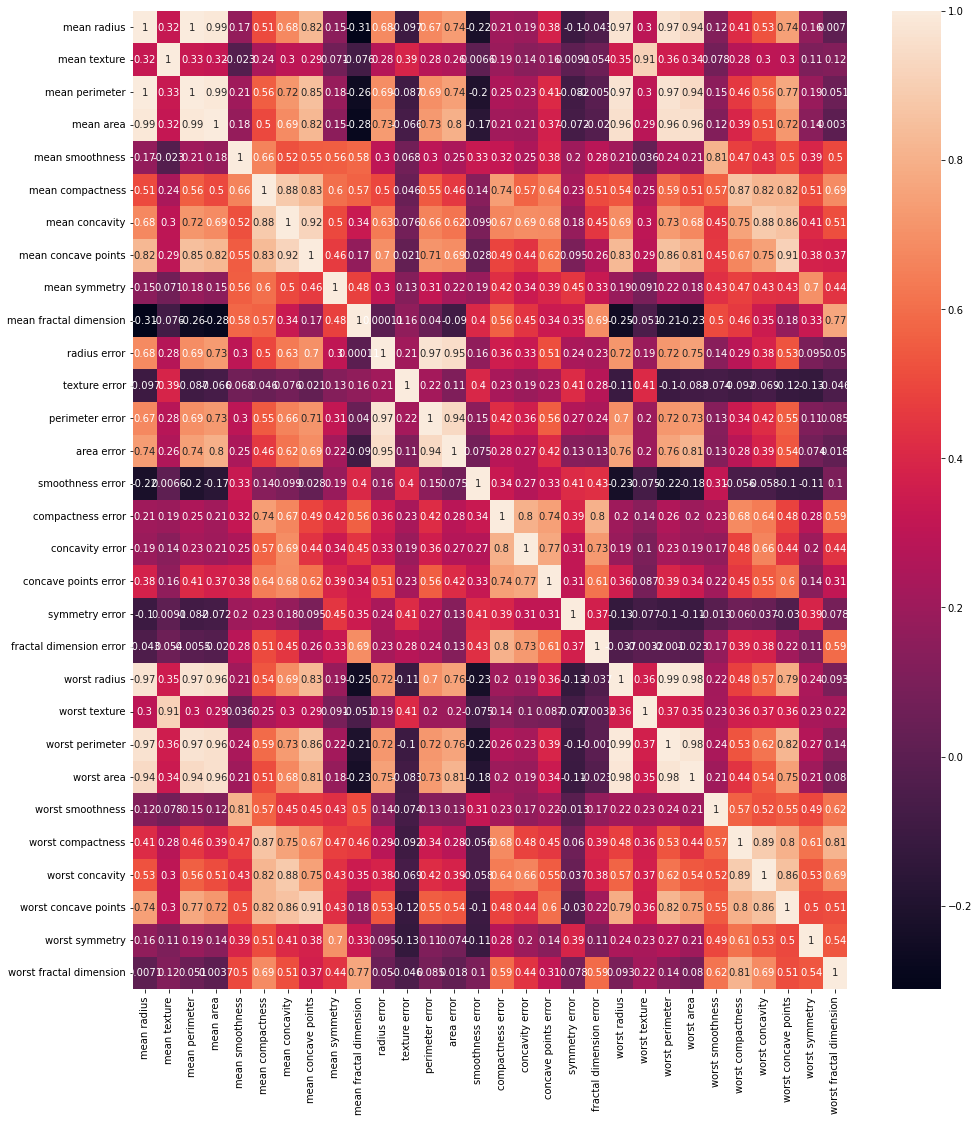

In [21]:
plt.figure(figsize=(16, 18))
sns.heatmap(df_feat.corr(), annot=True)

In [57]:
df_target = pd.DataFrame(df['target'], columns=['Cancer'])
df_target

,Cancer
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


<AxesSubplot:>

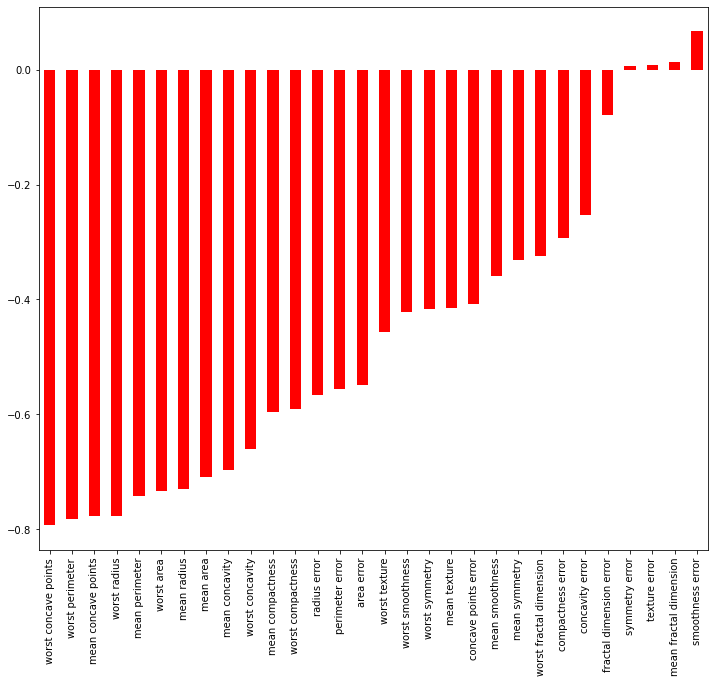

In [29]:
plt.figure(figsize=(12, 10))
df_feat.corrwith(df_target['Cancer']).sort_values().plot(kind="bar", color='red')

In [ ]:
# ** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

In [31]:
df_feat.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [32]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


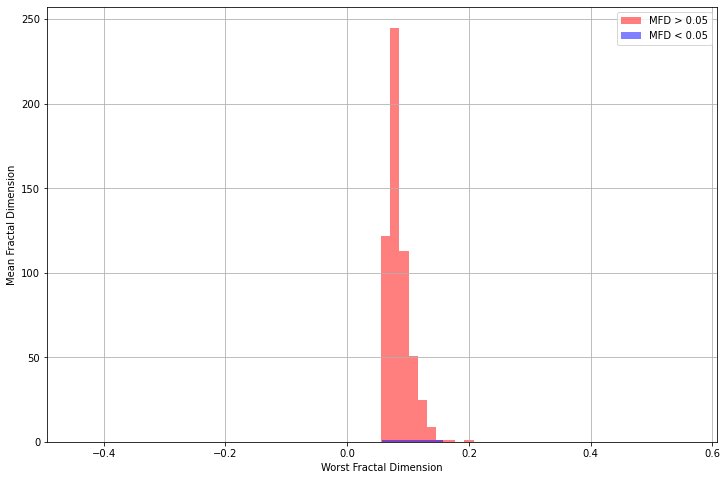

In [40]:
plt.figure(figsize=(12, 8))
df_feat[df_feat['mean fractal dimension'] > 0.05]['worst fractal dimension'].hist(bins=10, alpha=0.5, color='red', label='MFD > 0.05')
df_feat[df_feat['mean fractal dimension'] < 0.05]['worst fractal dimension'].hist(bins=10, alpha=0.5, color='blue', label='MFD < 0.05')
plt.legend()
plt.ylabel('Mean Fractal Dimension')
plt.xlabel('Worst Fractal Dimension')
plt.show()

<AxesSubplot:xlabel='worst concave points', ylabel='worst fractal dimension'>

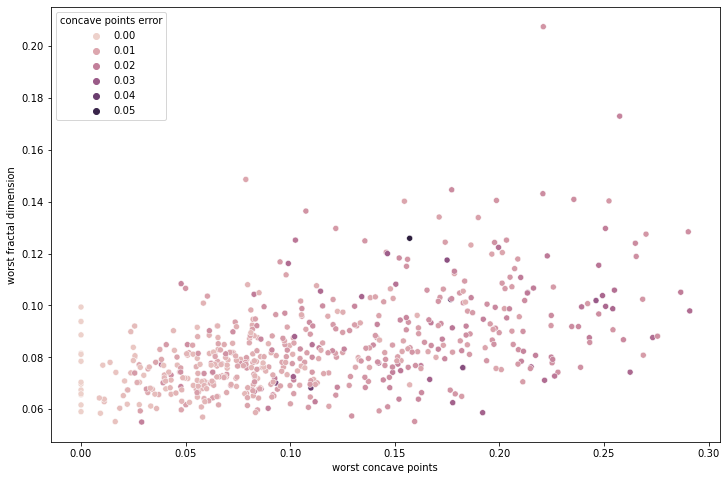

In [49]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='worst concave points', y='worst fractal dimension', hue='concave points error', data=df_feat)

<Figure size 864x576 with 0 Axes>

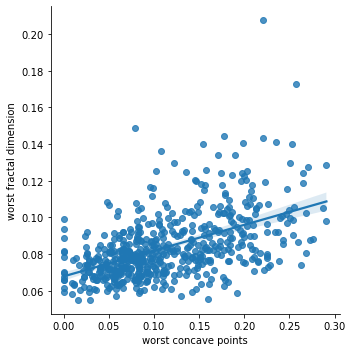

In [51]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='worst concave points', y='worst fractal dimension', data=df_feat, palette='coolwarm')

<Figure size 864x576 with 0 Axes>

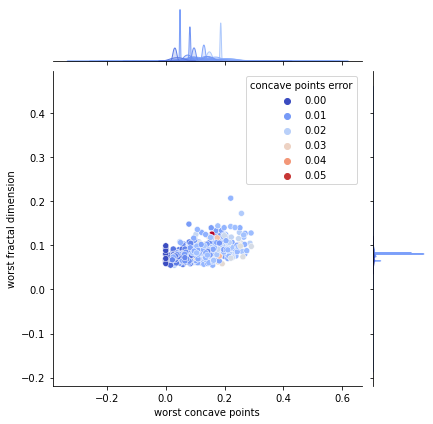

In [54]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='worst concave points', y='worst fractal dimension', hue='concave points error', data=df_feat, palette='coolwarm')

<Figure size 864x576 with 0 Axes>

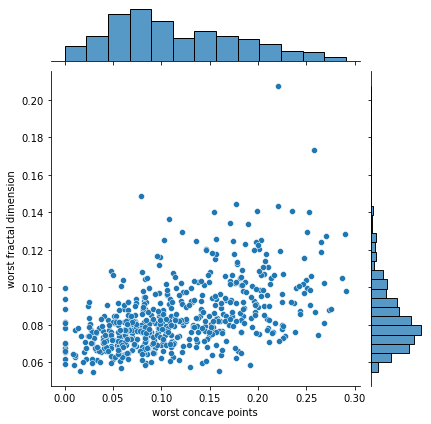

In [55]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='worst concave points', y='worst fractal dimension', data=df_feat, palette='coolwarm')

# Building the Support Vector Model (no GridSearch)

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.3, random_state=101)

In [61]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [62]:
y_pred = svm.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [64]:
print(confusion_matrix(y_test, y_pred))

[[ 56  10]
 [  3 102]]


# Building the Support Vector Model (with GridSearch)

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = {'C'     : [0.1, 1, 10, 100, 1000],
              'gamma' : [1, 0,1, 0.001, 0.0001, 0.00001]
             }

In [71]:
svc_cv = GridSearchCV(SVC(), param_grid, verbose=2)

In [73]:
svc_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=0; total time=   0.0s
[CV] END .....................................C=0.1, gamma=0; total time=   0.0s
[CV] END .....................................C=0.1, gamma=0; total time=   0.0s
[CV] END .....................................C=0.1, gamma=0; total time=   0.0s
[CV] END .....................................C=0.1, gamma=0; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C

[CV] END ................................C=100, gamma=0.0001; total time=   0.0s
[CV] END ................................C=100, gamma=0.0001; total time=   0.0s
[CV] END ................................C=100, gamma=0.0001; total time=   0.0s
[CV] END ................................C=100, gamma=0.0001; total time=   0.0s
[CV] END ................................C=100, gamma=0.0001; total time=   0.0s
[CV] END .................................C=100, gamma=1e-05; total time=   0.0s
[CV] END .................................C=100, gamma=1e-05; total time=   0.0s
[CV] END .................................C=100, gamma=1e-05; total time=   0.0s
[CV] END .................................C=100, gamma=1e-05; total time=   0.0s
[CV] END .................................C=100, gamma=1e-05; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0, 1, 0.001, 0.0001, 1e-05]},
             verbose=2)

In [74]:
svc_cv.best_estimator_

SVC(C=100, gamma=1e-05)

In [75]:
svc_cv.best_params_

{'C': 100, 'gamma': 1e-05}

In [76]:
svc_cv.best_score_

0.959746835443038

In [80]:
y_pred = svc_cv.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [82]:
print(confusion_matrix(y_test, y_pred))

[[ 59   7]
 [  4 101]]


# Good Job